# The Term Structure of Risk Premia

This models comes from ["Macro Strikes Back: The term structure of Risk Premia"](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4752696). This model allows the identification of risk premia across different time horizons.

We'll start by importing the model class and the replication data.

In [1]:
from empfin import RiskPremiaTermStructure, msb_replication

data_df = msb_replication()
gdp = data_df.pop("GDP")

To model estimation runs automatically when instanced. Depending on the number of draws you chose, the estimation might take a few minutes to run. In this example, we are using the US GDP as the non-tradeable factor.

In [2]:
rpts = RiskPremiaTermStructure(
    assets=data_df,
    factor=gdp,
    s_bar=12,
    n_draws=2000,
    burnin=2000,
    k=5,
)

100%|██████████| 4000/4000 [05:43<00:00, 11.65it/s]


To summarize the result, the class has the `plot_premia_term_strucuture` method.

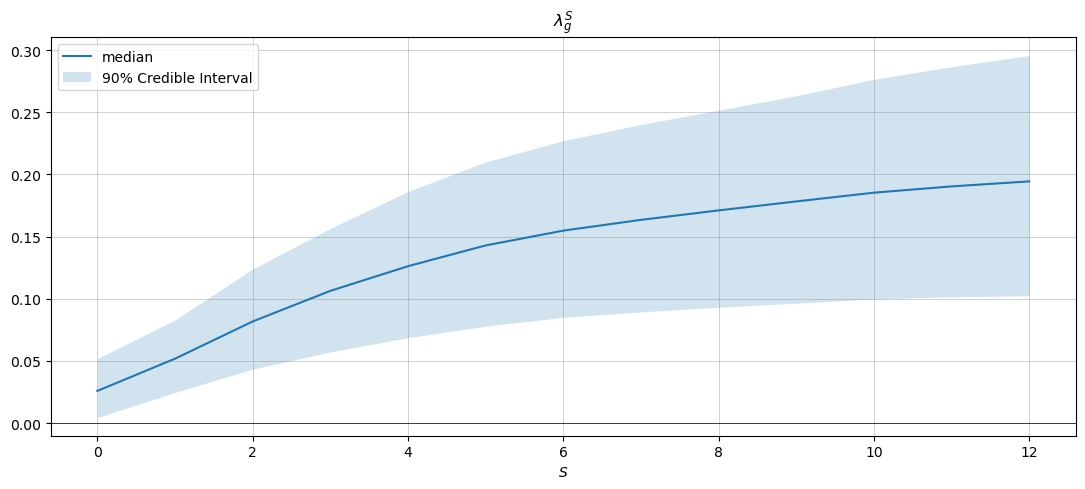

In [3]:
rpts.plot_premia_term_structure()

We can also visualize the median of the factor loadings

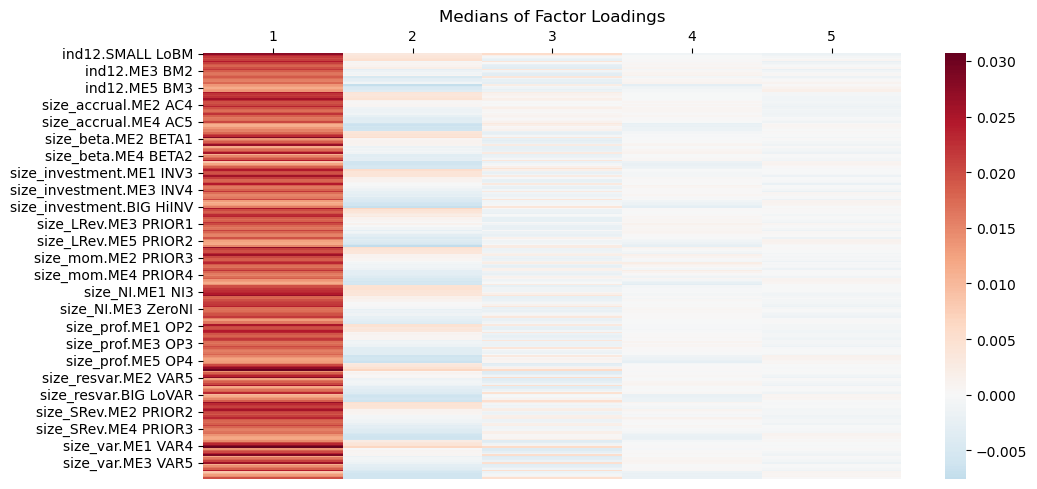

In [4]:
rpts.plot_loadings_heatmap()

The chart above has 275 lines, one for each asset. So most of the labels are not shown.

We can also compute the factor mimicking portfolios for a given horizon

In [5]:
w_fm = rpts.factor_mimicking_portfolio(S=4)
w_fm.median()

ind12.SMALL LoBM     -0.032302
ind12.ME1 BM2        -0.025190
ind12.ME1 BM3         0.098024
ind12.ME1 BM4         0.179059
ind12.SMALL HiBM      0.317188
                        ...   
size_var.BIG LoVAR    0.138836
size_var.ME5 VAR2     0.182059
size_var.ME5 VAR3     0.175839
size_var.ME5 VAR4     0.197260
size_var.BIG HiVAR    0.114994
Length: 275, dtype: float64